In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF

def sturges(data): 
    return int((1 + 3.3 * np.log10(len(data))))

df_smart_tv = pd.read_csv('dataset_smart-tv.csv', usecols = ['bytes_up','bytes_down'])
df_chromecast = pd.read_csv('dataset_chromecast.csv', usecols = ['bytes_up','bytes_down'])

df_smart_tv = np.log10(df_smart_tv.replace(0, np.nan))
df_chromecast = np.log10(df_chromecast.replace(0, np.nan))

df_smart_tv = df_smart_tv.replace(np.nan, 0)
df_chromecast = df_chromecast.replace(np.nan, 0)

df_smart_tv, df_chromecast

(         bytes_up  bytes_down
 0        5.123633    6.449962
 1        5.063598    6.354955
 2        5.057019    6.363475
 3        4.987535    6.302449
 4        4.597361    5.906413
 ...           ...         ...
 4417898  0.903090    0.903090
 4417899  0.903090    0.903090
 4417900  0.903090    0.903090
 4417901  0.903090    0.903090
 4417902  0.903090    1.505150
 
 [4417903 rows x 2 columns],
          bytes_up  bytes_down
 0        3.475238    4.691839
 1        2.836283    2.516215
 2        3.652624    4.578800
 3        2.889936    2.360215
 4        3.488736    4.713127
 ...           ...         ...
 1620524  3.306211    4.637810
 1620525  3.850524    3.201943
 1620526  2.688420    4.695762
 1620527  0.000000    2.133539
 1620528  0.000000    1.982271
 
 [1620529 rows x 2 columns])

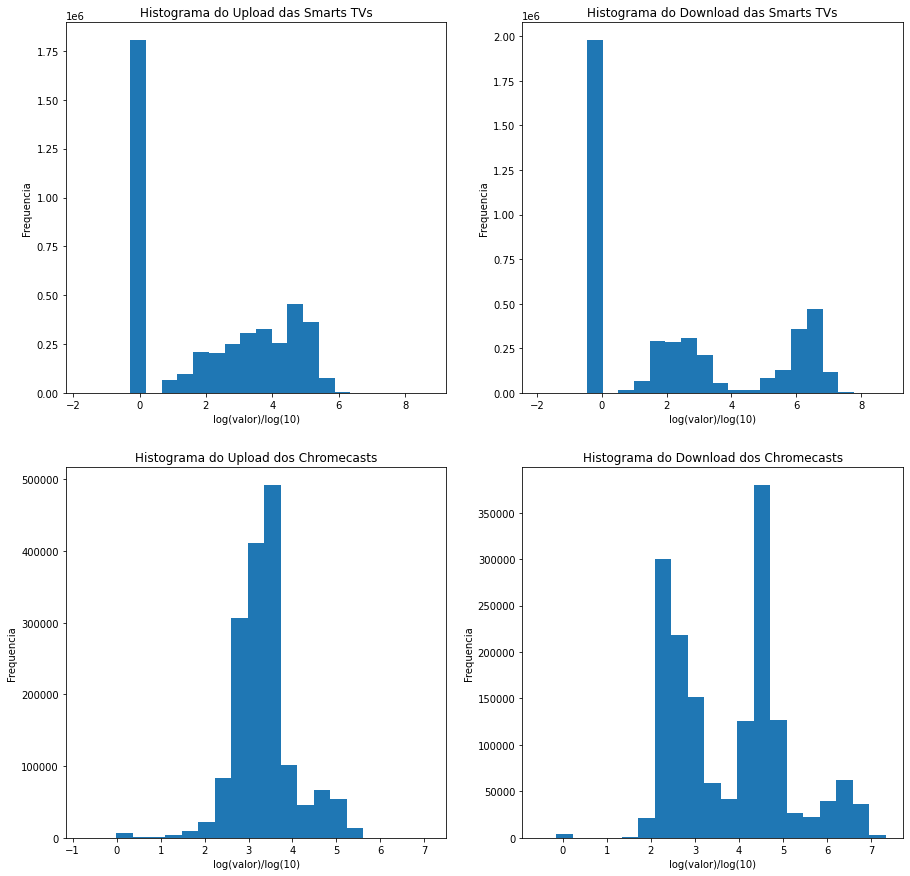

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

ax[0][0].hist(df_smart_tv['bytes_up'], bins=sturges(df_smart_tv['bytes_up']))
ax[0][0].set_title("Histograma do Upload das Smarts TVs")
ax[0][0].set_xlabel("log(valor)/log(10)")
ax[0][0].set_ylabel("Frequencia")

ax[0][1].hist(df_smart_tv['bytes_down'], bins=sturges(df_smart_tv['bytes_down']))
ax[0][1].set_title("Histograma do Download das Smarts TVs")
ax[0][1].set_xlabel("log(valor)/log(10)")
ax[0][1].set_ylabel("Frequencia")

ax[1][0].hist(df_chromecast['bytes_up'], bins=sturges(df_chromecast['bytes_up']))
ax[1][0].set_title("Histograma do Upload dos Chromecasts")
ax[1][0].set_xlabel("log(valor)/log(10)")
ax[1][0].set_ylabel("Frequencia")

ax[1][1].hist(df_chromecast['bytes_down'], bins=sturges(df_chromecast['bytes_down']))
ax[1][1].set_title("Histograma do Download dos Chromecasts")
ax[1][1].set_xlabel("log(valor)/log(10)")
ax[1][1].set_ylabel("Frequencia")

plt.show()

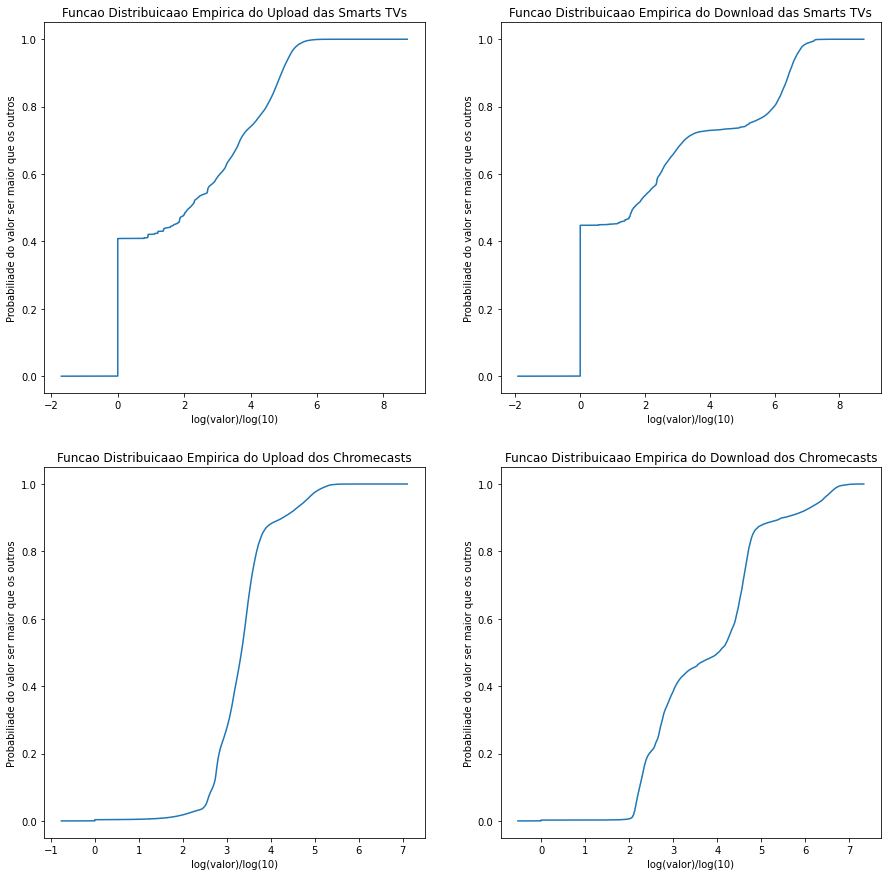

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

edf_up_smart_tv = ECDF(df_smart_tv['bytes_up'])
ax[0][0].plot(edf_up_smart_tv.x, edf_up_smart_tv.y)
ax[0][0].set_title("Funcao Distribuicaao Empirica do Upload das Smarts TVs")
ax[0][0].set_xlabel("log(valor)/log(10)")
ax[0][0].set_ylabel("Probabiliade do valor ser maior que os outros")


edf_down_smart_tv = ECDF(df_smart_tv['bytes_down'])
ax[0][1].plot(edf_down_smart_tv.x, edf_down_smart_tv.y)
ax[0][1].set_title("Funcao Distribuicaao Empirica do Download das Smarts TVs")
ax[0][1].set_xlabel("log(valor)/log(10)")
ax[0][1].set_ylabel("Probabiliade do valor ser maior que os outros")

edf_up_chromecast = ECDF(df_chromecast['bytes_up'])
ax[1][0].plot(edf_up_chromecast.x, edf_up_chromecast.y)
ax[1][0].set_title("Funcao Distribuicaao Empirica do Upload dos Chromecasts")
ax[1][0].set_xlabel("log(valor)/log(10)")
ax[1][0].set_ylabel("Probabiliade do valor ser maior que os outros")

edf_down_chromecast = ECDF(df_chromecast['bytes_down'])
ax[1][1].plot(edf_down_chromecast.x, edf_down_chromecast.y)
ax[1][1].set_title("Funcao Distribuicaao Empirica do Download dos Chromecasts")
ax[1][1].set_xlabel("log(valor)/log(10)")
ax[1][1].set_ylabel("Probabiliade do valor ser maior que os outros")

plt.show()

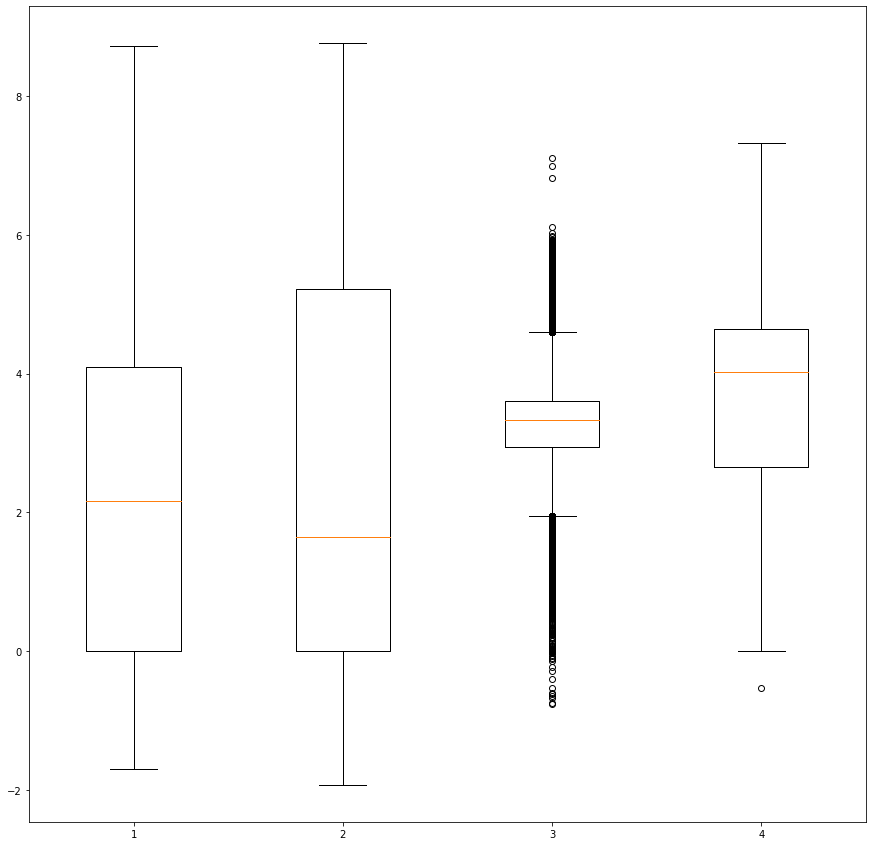

In [68]:
plt.figure(figsize=(15, 15))
plt.boxplot([df_smart_tv['bytes_up'], df_smart_tv['bytes_down'], df_chromecast['bytes_up'], df_chromecast['bytes_down']])
plt.show()

In [69]:
mean_up_smart_tv =  np.mean(df_smart_tv['bytes_up'])
mean_down_smart_tv = np.mean(df_smart_tv['bytes_down'])
mean_up_chromecast = np.mean(df_chromecast['bytes_up'])
mean_down_chromecast = np.mean(df_chromecast['bytes_down'])

mean_up_smart_tv, mean_down_smart_tv, mean_up_chromecast, mean_down_chromecast

(2.1565902037563727, 2.350172639895904, 3.3496717251158694, 3.799335488086478)

In [71]:
var_up_smart_tv =  np.var(df_smart_tv['bytes_up'])
var_down_smart_tv = np.var(df_smart_tv['bytes_down'])
var_up_chromecast = np.var(df_chromecast['bytes_up'])
var_down_chromecast = np.var(df_chromecast['bytes_down'])

var_up_smart_tv, var_down_smart_tv, var_up_chromecast, var_down_chromecast

(4.113081821312754, 6.723919241664436, 0.46159988408254227, 1.6659787862763265)

In [72]:
std_up_smart_tv =  np.std(df_smart_tv['bytes_up'])
std_down_smart_tv = np.std(df_smart_tv['bytes_down'])
std_up_chromecast = np.std(df_chromecast['bytes_up'])
std_down_chromecast = np.std(df_chromecast['bytes_down'])

std_up_smart_tv, std_down_smart_tv, std_up_chromecast, std_down_chromecast

(2.028073426016118, 2.5930521093229957, 0.6794114247512638, 1.2907280063112936)